In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [2]:
(x_train, y_train), (x_test, y_test) =  tf.keras.datasets.mnist.load_data()
x_test.max()


255

In [3]:
x_train = x_train / 255
x_test = x_test / 255
class_names = np.unique(y_train)
# print("Class Names:", class_names)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

<function matplotlib.pyplot.show(close=None, block=None)>

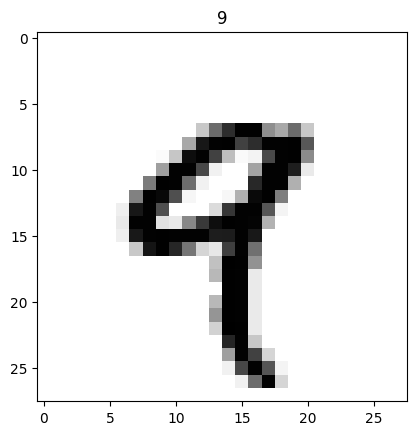

In [4]:
#Plot a random sample and display its label in the title. Remember to set a suitable colormap!
idx = 4
img = x_train[idx]
label = y_train[idx]
plt.imshow(img, cmap="binary")
plt.title(f"{class_names[label]}")
plt.show


In [5]:
from sklearn.model_selection import train_test_split
from keras import layers
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)
print(x_train.shape)
print(x_val.shape)


(48000, 28, 28)
(12000, 28, 28)


* Channels: the term "channels" usually refers to the number of filters or kernels applied in a convolutional layer. Each filter detects different features in the input data, and the output of each filter forms a channel in the next layer.

* Max Pooling: When a pool size is not explicitly specified, a common choice is to use a pool size of (2, 2), which means the operation considers 2x2 patches and takes the maximum value from each patch.

* Kernel Size:  The kernel_size parameter is a tuple specifying the height and width of the 2D convolution window. For example, kernel_size=(3, 3) means a 3x3 convolution window. The choice of kernel size is a hyperparameter, and it affects the receptive field of the convolutional layer.

* model.add(layers.Flatten(input_shape = (28,28))) #The first layer is a Flatten layer. This layer is responsible for converting the 2D input (28x28 pixels of an image) into a 1D array (28 * 28 = 784 elements). It's like unrolling a carpet into a straight line.

* model.add(layers.Dense(256, activation="relu"))#add a fully connected (Dense) layer with 256 neurons. Each neuron in this layer is connected to every output of the previous layer (Flatten layer)
    

In [6]:
def build_model():
    model = tf.keras.Sequential()
    #Stage 1
    model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    #Stage 2
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(14, 14, 1)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    #Stage 3
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(7, 7, 1)))
    #Stage 4
    model.add(layers.Flatten(input_shape=(7, 7)))
    #Stage 5
    model.add(layers.Dense(1568, activation="relu"))
    model.add(layers.Dropout(0.2))
    #Stage 6
    model.add(layers.Dense(128, activation="softmax"))
    return model


model = build_model()
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 288)              

In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(), 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

In [8]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)


Epoch 1/10


1500/1500 [==============================] - 14s 8ms/step - loss: 0.2056 - accuracy: 0.9384 - val_loss: 0.0741 - val_accuracy: 0.9773
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0635 - accuracy: 0.9796 - val_loss: 0.0523 - val_accuracy: 0.9837
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0457 - accuracy: 0.9860 - val_loss: 0.0437 - val_accuracy: 0.9872
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0360 - accuracy: 0.9889 - val_loss: 0.0512 - val_accuracy: 0.9846
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0305 - accuracy: 0.9899 - val_loss: 0.0419 - val_accuracy: 0.9879
Epoch 6/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.0509 - val_accuracy: 0.9856
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0217 - accuracy: 0.9931 - val_loss: 0.0512 - val_

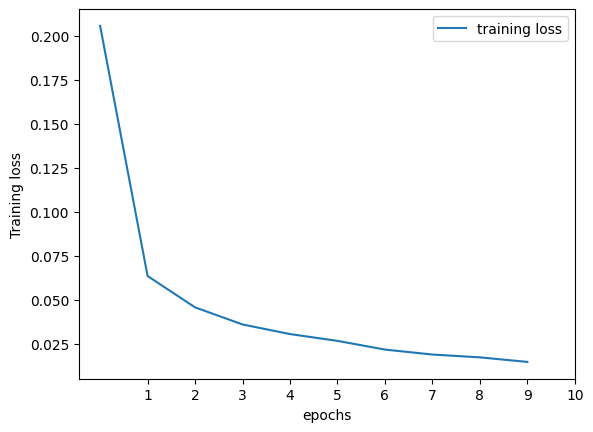

In [9]:
# Plot accuracy
# plt.figure(figsize=(4, 3))
plt.plot(history.history["loss"], label="training loss")
plt.legend()
# plt.xlim([0,10])
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.xlabel("epochs")
plt.ylabel("Training loss")

plt.show()

313/313 [==============================] - 1s 3ms/step
2 2
0.00 - 0
0.00 - 1
1.00 - 2
0.00 - 3
0.00 - 4
0.00 - 5
0.00 - 6
0.00 - 7
0.00 - 8
0.00 - 9


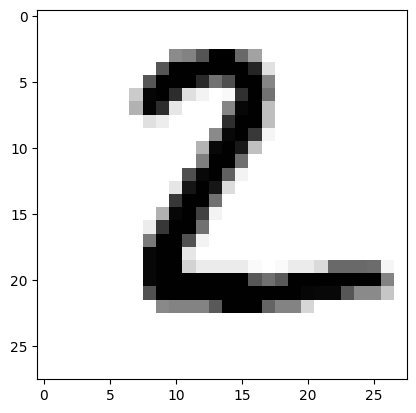

In [10]:
y_predicted = model.predict(x_test)
y_predicted.shape
# Get prediction for a test image 
img = x_test[1]
pred = y_predicted[1]
true_class = y_test[1]
plt.imshow(img, cmap="binary")
print(class_names[true_class], true_class)
pred
# Why does the prediction look like this? -> softmax activation, 10 classes
for i in range(10):
    print(f"{pred[i]:.2f} - {class_names[i]}")

pred.max()
class_names[pred.argmax()]
# Turn all predictions into predicted classes (0, 1, 2 ... or 9)
predicted_classes = np.argmax(y_predicted, axis=-1)

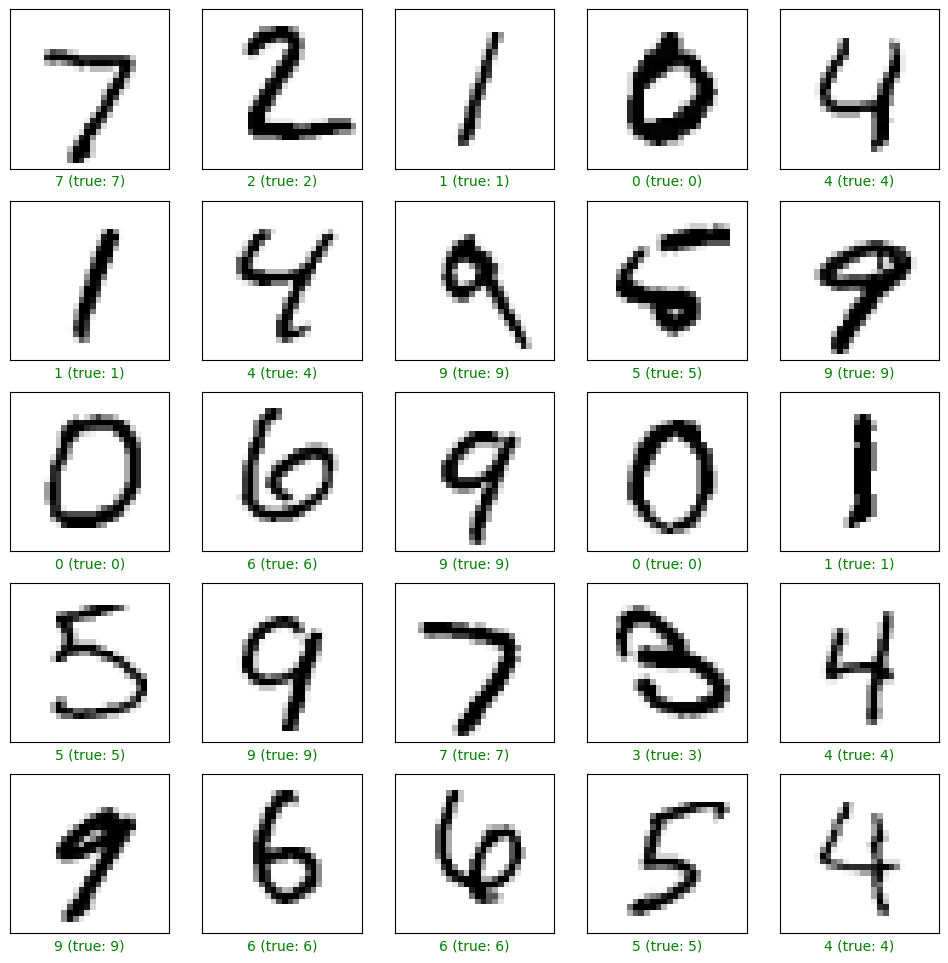

In [11]:
plt.figure(figsize=(12, 12))
for i in range(25):
    
    # Get true class for current image
    true_class = class_names[y_test[i]]
    
    # Get prediction
    prediction = y_predicted[i]
    predicted_class = class_names[np.argmax(prediction)]
    
    text = f"{predicted_class} (true: {true_class})"
    
    color = "green" if predicted_class == true_class else "red"
    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap="binary")
    plt.xlabel(text, color=color)
plt.show()

In [12]:
# Get accuracy for test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc *= 100

print(f"Test accuracy: {test_acc:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.0438 - accuracy: 0.9900
Test accuracy: 99.00%


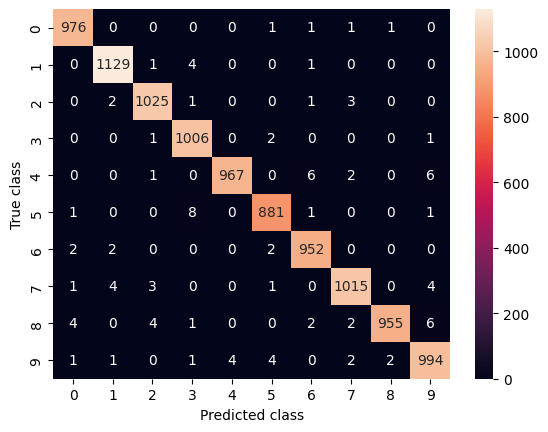

In [13]:
# Show confusion matrix for test dataset
conf_matrix = sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=predicted_classes)
sns.heatmap(conf_matrix, annot=True, fmt="d",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()